In [1]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('iammustafatz/diabetes-prediction-dataset' , path = 'data/' , unzip=True)

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [3]:
df = pd.read_csv('data/diabetes_prediction_dataset.csv')

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: >

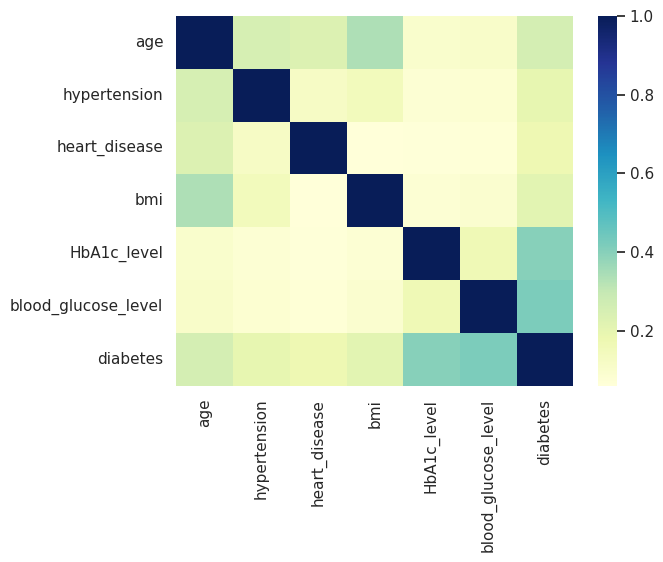

In [7]:
sns.heatmap(df.corr(numeric_only=True) , cmap = 'YlGnBu')

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

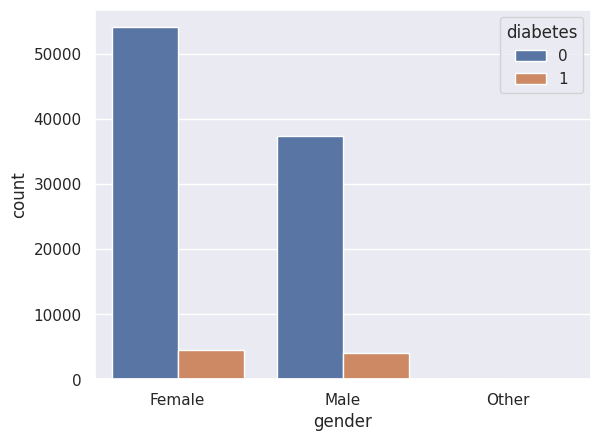

In [8]:
sns.countplot(data = df , x = 'gender' , hue = 'diabetes')
df['gender'].value_counts()

<Axes: xlabel='age', ylabel='Count'>

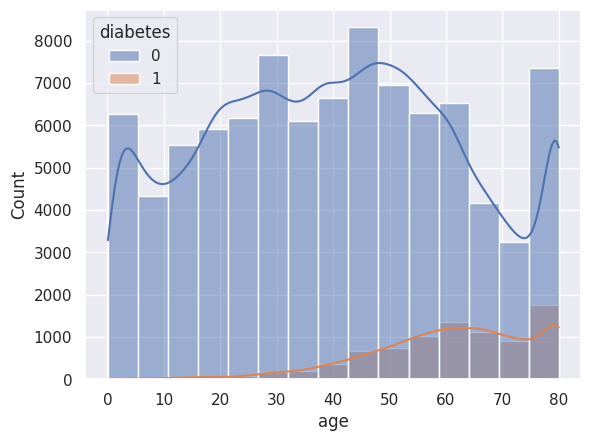

In [9]:
sns.histplot(data = df , x = 'age'  , kde = True , bins = 15 , hue = 'diabetes')

<Axes: xlabel='hypertension', ylabel='count'>

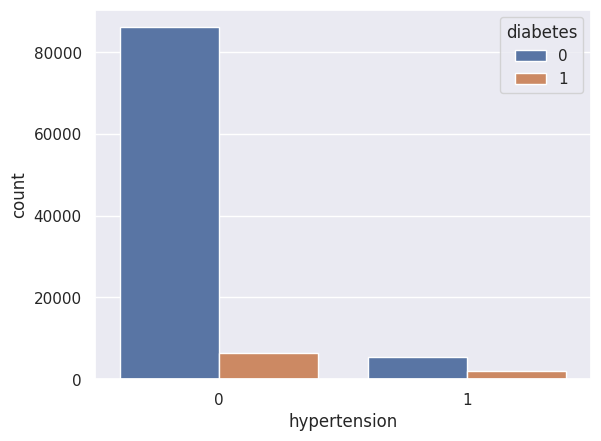

In [10]:
sns.countplot(data = df , x = 'hypertension' , hue = 'diabetes')

<Axes: xlabel='heart_disease', ylabel='count'>

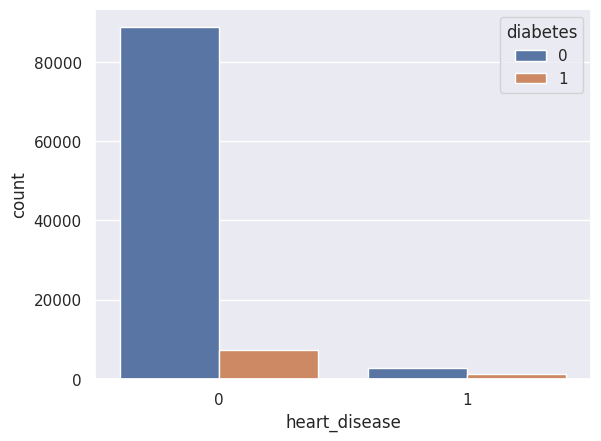

In [11]:
sns.countplot(data = df , x = 'heart_disease' , hue = 'diabetes')

<Axes: xlabel='smoking_history', ylabel='count'>

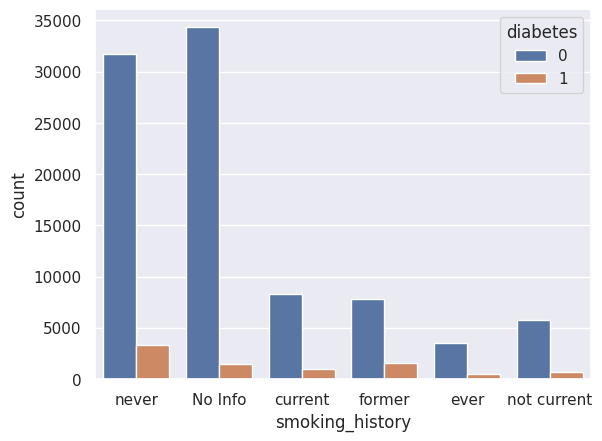

In [12]:
sns.countplot(data = df , x = 'smoking_history' , hue = 'diabetes')

<Axes: xlabel='bmi', ylabel='Count'>

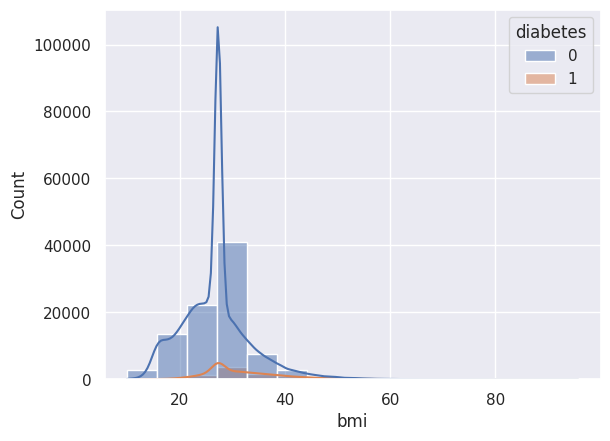

In [13]:
sns.histplot(data =df , x = 'bmi' , bins = 15 , hue = 'diabetes' , kde = True)

<Axes: xlabel='HbA1c_level', ylabel='Count'>

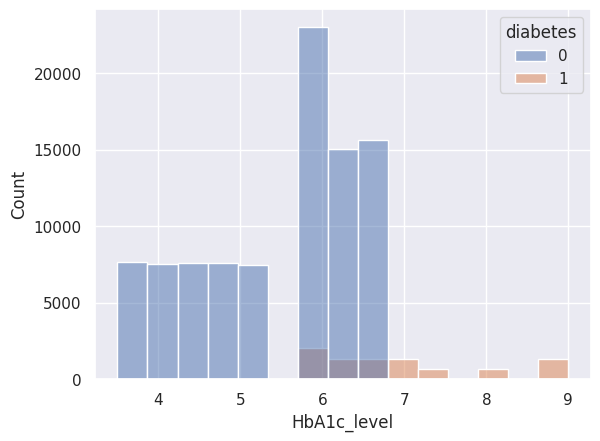

In [14]:
sns.histplot(data = df , x = 'HbA1c_level' , bins = 15 , hue = 'diabetes')

<Axes: xlabel='blood_glucose_level', ylabel='Count'>

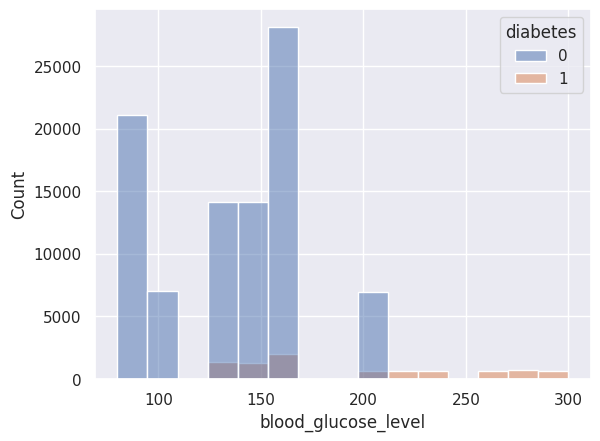

In [15]:
sns.histplot(data = df , x = 'blood_glucose_level' , hue = 'diabetes' , bins = 15)

In [17]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [18]:
## split the data 
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits= 1 , test_size=0.25)
for train_indices , test_indices in split.split(df , df[['gender' , 'hypertension' , 'heart_disease' , 'diabetes']]):
    strat_train_set = df.loc[train_indices]
    strat_test_set = df.loc[test_indices]

In [19]:
strat_train_set

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
14428,Female,55.0,0,0,never,40.38,6.1,155,0
98401,Male,67.0,0,0,No Info,28.85,6.0,130,0
18679,Male,39.0,0,0,No Info,27.32,6.5,155,0
61746,Female,80.0,0,0,not current,15.23,5.7,280,1
29665,Female,34.0,0,0,never,27.54,6.6,130,0
...,...,...,...,...,...,...,...,...,...
45989,Male,42.0,0,0,never,31.05,5.7,260,1
60570,Female,50.0,1,0,never,26.08,4.5,200,0
47960,Male,24.0,0,0,former,23.20,5.8,160,0
18767,Female,6.0,0,0,No Info,27.32,5.0,158,0


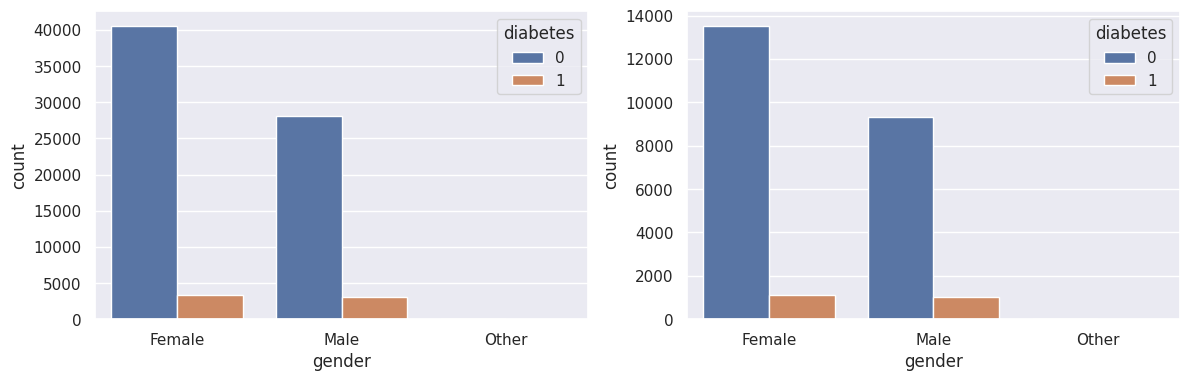

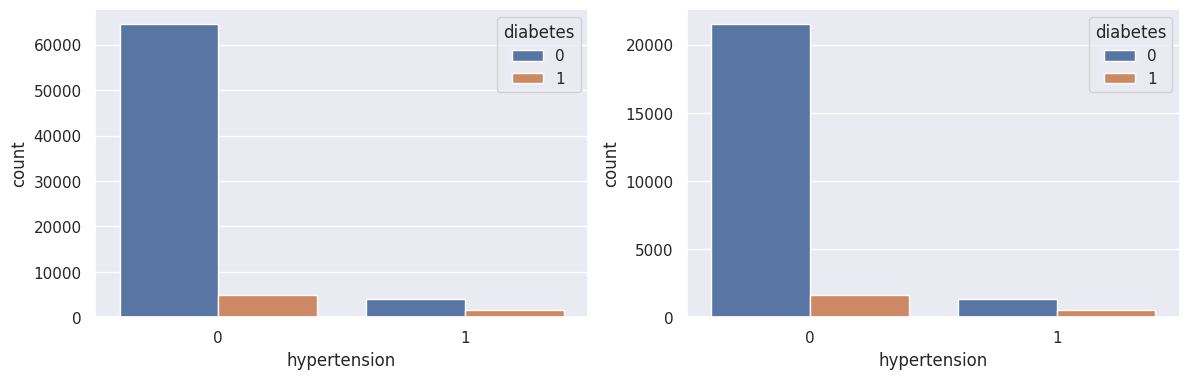

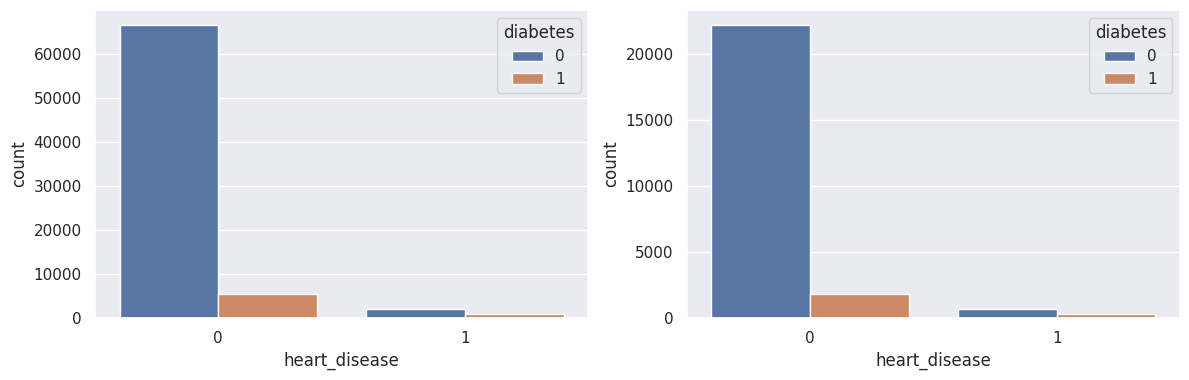

In [24]:
## check the distribution in both train test
for col in ['gender' , 'hypertension' , 'heart_disease']:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.countplot(data = strat_train_set , x = col , hue = 'diabetes')
    plt.subplot(122)
    sns.countplot(data = strat_test_set , x = col , hue = 'diabetes')
    plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [32]:
strat_train_set

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
14428,Female,55.0,0,0,never,40.38,6.1,155,0
98401,Male,67.0,0,0,No Info,28.85,6.0,130,0
18679,Male,39.0,0,0,No Info,27.32,6.5,155,0
61746,Female,80.0,0,0,not current,15.23,5.7,280,1
29665,Female,34.0,0,0,never,27.54,6.6,130,0
...,...,...,...,...,...,...,...,...,...
45989,Male,42.0,0,0,never,31.05,5.7,260,1
60570,Female,50.0,1,0,never,26.08,4.5,200,0
47960,Male,24.0,0,0,former,23.20,5.8,160,0
18767,Female,6.0,0,0,No Info,27.32,5.0,158,0


In [50]:
## we have to encode the variables now 
## ohe - ['gender' , 'smoking_history']
from sklearn.preprocessing import OneHotEncoder
## create a column transformer
from sklearn.compose import ColumnTransformer

ohe = ColumnTransformer(
    transformers=[
        ('ohe' , OneHotEncoder(handle_unknown='ignore' , sparse_output=False) , ['gender' , 'smoking_history'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)
ohe.set_output(transform='pandas')
## after one hot encoding we have to standardize the data

,transformers,"[('ohe', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [51]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('ohe' , ohe)
])

In [52]:
pipeline.fit_transform(strat_test_set)

,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
76434,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70.00,0,0,23.89,6.5,200,0
91455,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.00,0,0,28.77,5.7,160,0
31663,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,80.00,1,0,27.32,5.0,200,0
32924,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.00,0,0,30.82,4.0,90,0
25911,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.00,0,0,27.32,4.0,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72493,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.48,0,0,27.32,5.8,126,0
69243,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62.00,0,0,27.32,4.8,200,0
55516,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,79.00,0,0,27.32,5.7,155,0
4945,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.00,0,0,23.89,6.2,140,0


In [53]:
X_train = pipeline.fit_transform(strat_train_set.drop('diabetes' , axis = 1))
X_test = pipeline.fit_transform(strat_test_set.drop('diabetes' , axis=1))
y_train = strat_train_set['diabetes']
y_test = strat_test_set['diabetes']

In [56]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((75000, 15), (25000, 15), (75000,), (25000,))

In [57]:
X_train.head()

,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
14428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,55.0,0,0,40.38,6.1,155
98401,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,67.0,0,0,28.85,6.0,130
18679,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39.0,0,0,27.32,6.5,155
61746,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80.0,0,0,15.23,5.7,280
29665,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,0,0,27.54,6.6,130


In [58]:
## train a logistic regression model without standardizing
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train ,y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_pred , y_test)

/home/kasim/Projects/Machine-Learning-Projects/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.96024

In [59]:
## check if it is overfitting
accuracy_score(lr.predict(X_train) , y_train)

0.9590666666666666

In [62]:
## standardize and find
from sklearn.preprocessing import StandardScaler
X_train_stand = StandardScaler().fit_transform(X_train)
X_test_stand = StandardScaler().fit_transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_stand ,y_train)
y_pred = lr.predict(X_test_stand)

from sklearn.metrics import accuracy_score
print(f'Accuracy on test set : {accuracy_score(y_pred , y_test)}\nAccuracy on train set : {accuracy_score(lr.predict(X_train_stand) , y_train)}')

Accuracy on test set : 0.96052
Accuracy on train set : 0.96008


In [63]:
## try a random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param_grid = [
    {'n_estimators' : [10,100,200,500] , 'max_depth' : [None , 5, 10] , 'min_samples_split' : [2,3,4]}
]

grid_search = GridSearchCV(rf , param_grid , cv = 3 , scoring='accuracy' , return_train_score=True)
grid_search.fit(X_train , y_train)

,estimator,RandomForestClassifier()
,param_grid,"[{'max_depth': [None, 5, ...], 'min_samples_split': [2, 3, ...], 'n_estimators': [10, 100, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,100


In [65]:
grid_search.score(X_test , y_test)

0.9726

In [66]:
## try with scaling 
## try a random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param_grid = [
    {'n_estimators' : [10,100,200,500] , 'max_depth' : [None , 5, 10] , 'min_samples_split' : [2,3,4]}
]

grid_search = GridSearchCV(rf , param_grid , cv = 3 , scoring='accuracy' , return_train_score=True)
grid_search.fit(X_train_stand , y_train)

,estimator,RandomForestClassifier()
,param_grid,"[{'max_depth': [None, 5, ...], 'min_samples_split': [2, 3, ...], 'n_estimators': [10, 100, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,10


In [68]:
grid_search.score(X_test_stand , y_test)

0.9726